import Libraries

In [ ]:
import pandas as pd

Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Set File Path

In [ ]:
# Provide the correct file path without the trailing slash
file_path = "/content/drive/My Drive/Colombo_Stock_Change/CSC.csv"

# Read the CSV file
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061774,67766400
1,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060700,47894400
2,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.059089,58435200
3,1986-03-21,0.095486,0.097222,0.091146,0.092882,0.057477,59990400
4,1986-03-24,0.092882,0.092882,0.089410,0.090278,0.055866,65289600


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
9070,2022-03-11,287.959991,289.510010,279.429993,280.070007,275.091339,27209300
9071,2022-03-14,280.339996,285.399994,275.820007,276.440002,271.525909,30660700
9072,2022-03-15,280.350006,287.820007,278.730011,287.149994,282.045502,34245100
9073,2022-03-16,289.109985,294.570007,283.200012,294.390015,289.156860,37826300
9074,2022-03-17,293.290009,295.609985,289.369995,295.220001,289.972046,30816600


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1986-03-18,0.099826
1,1986-03-19,0.098090
2,1986-03-20,0.095486
3,1986-03-21,0.092882
4,1986-03-24,0.090278
...,...,...
9070,2022-03-11,280.070007
9071,2022-03-14,276.440002
9072,2022-03-15,287.149994
9073,2022-03-16,294.390015


In [ ]:
df['Date']

0       1986-03-18
1       1986-03-19
2       1986-03-20
3       1986-03-21
4       1986-03-24
           ...    
9070    2022-03-11
9071    2022-03-14
9072    2022-03-15
9073    2022-03-16
9074    2022-03-17
Name: Date, Length: 9075, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-18')
datetime_object

datetime.datetime(1986, 3, 18, 0, 0)

In [ ]:
df

,Date,Close
0,1986-03-18,0.099826
1,1986-03-19,0.098090
2,1986-03-20,0.095486
3,1986-03-21,0.092882
4,1986-03-24,0.090278
...,...,...
9070,2022-03-11,280.070007
9071,2022-03-14,276.440002
9072,2022-03-15,287.149994
9073,2022-03-16,294.390015


Change datatype of DateTime to datetime64

In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      1986-03-18
1      1986-03-19
2      1986-03-20
3      1986-03-21
4      1986-03-24
          ...    
9070   2022-03-11
9071   2022-03-14
9072   2022-03-15
9073   2022-03-16
9074   2022-03-17
Name: Date, Length: 9075, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-18,0.099826
1986-03-19,0.098090
1986-03-20,0.095486
1986-03-21,0.092882
1986-03-24,0.090278
...,...
2022-03-11,280.070007
2022-03-14,276.440002
2022-03-15,287.149994


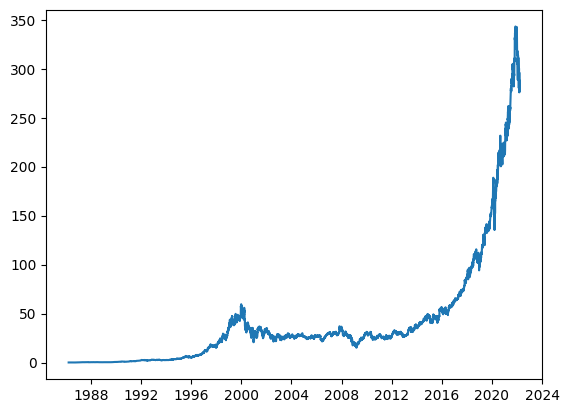

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '1987-03-18	',
                                '2022-03-17',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,1987-03-18,0.287326,0.285590,0.295139,0.310764
1,1987-03-19,0.285590,0.295139,0.310764,0.316840
2,1987-03-20,0.295139,0.310764,0.316840,0.313368
3,1987-03-23,0.310764,0.316840,0.313368,0.311198
4,1987-03-24,0.316840,0.313368,0.311198,0.313368
...,...,...,...,...,...
8817,2022-03-11,275.850006,288.500000,285.589996,280.070007
8818,2022-03-14,288.500000,285.589996,280.070007,276.440002
8819,2022-03-15,285.589996,280.070007,276.440002,287.149994
8820,2022-03-16,280.070007,276.440002,287.149994,294.390015


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((8822,), (8822, 3, 1), (8822,))

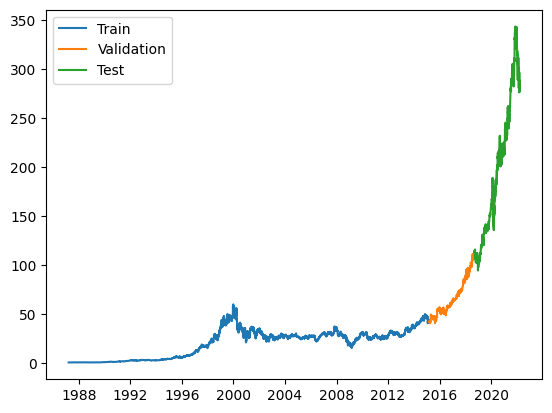

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

Epoch 1/50
221/221 [==============================] - 5s 7ms/step - loss: 141.1344 - mean_absolute_error: 5.9249 - val_loss: 601.3486 - val_mean_absolute_error: 16.9927
Epoch 2/50
221/221 [==============================] - 1s 4ms/step - loss: 0.3696 - mean_absolute_error: 0.3416 - val_loss: 473.6398 - val_mean_absolute_error: 14.1651
Epoch 3/50
221/221 [==============================] - 1s 4ms/step - loss: 0.3420 - mean_absolute_error: 0.3416 - val_loss: 428.8004 - val_mean_absolute_error: 13.2739
Epoch 4/50
221/221 [==============================] - 1s 4ms/step - loss: 0.3230 - mean_absolute_error: 0.3349 - val_loss: 397.3151 - val_mean_absolute_error: 12.4657
Epoch 5/50
221/221 [==============================] - 1s 4ms/step - loss: 0.3600 - mean_absolute_error: 0.3630 - val_loss: 391.8537 - val_mean_absolute_error: 12.3247
Epoch 6/50
221/221 [==============================] - 1s 4ms/step - loss: 0.3153 - mean_absolute_error: 0.3314 - val_loss: 376.2274 - val_mean_absolute_error: 11.9

221/221 [==============================] - 1s 2ms/step


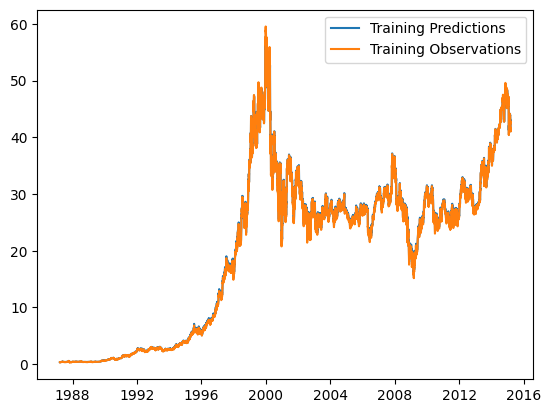

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

28/28 [==============================] - 0s 2ms/step


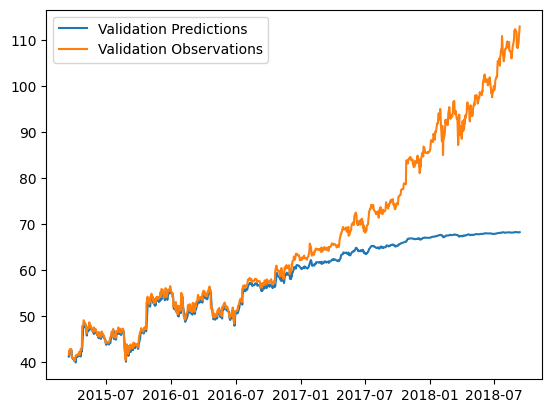

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

28/28 [==============================] - 0s 2ms/step


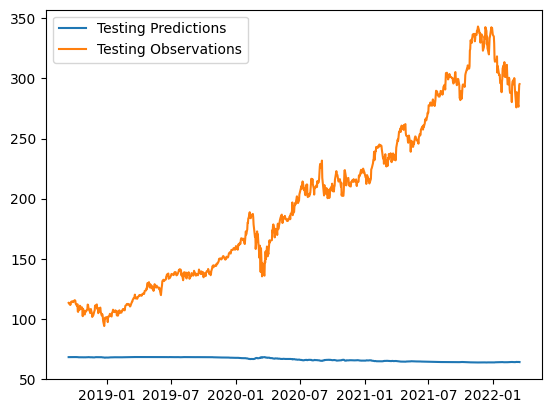

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

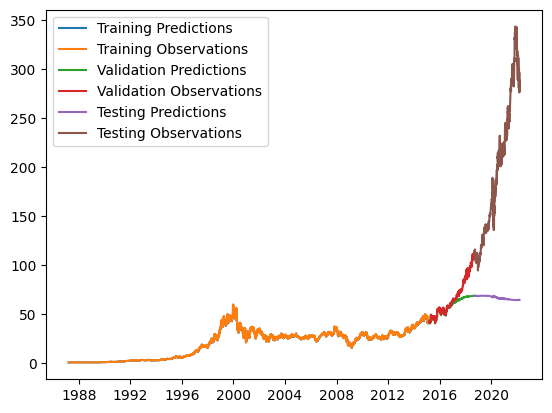

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from sklearn.metrics import mean_squared_error

# Sample actual closing prices (you would replace this with your actual data)
actual_close_prices = [47.9800,47.5900,47.4700,47.7500,47.8100]

# Sample predicted closing prices (you would replace this with your predicted data)
predicted_close_prices = [41.4316,41.0948,40.9912,41.2330,41.2848]

# Calculate RMSE
mse = mean_squared_error(actual_close_prices, predicted_close_prices)
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 6.512964595021227
